In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.style.use("ggplot")

In [2]:
# ml
fillVolume = 10
# Convert to SI-units
fillVolume = fillVolume * 1e-3

# Seconds
testOne = np.array([6.78, 6.87, 6.80, 6.72])
meanOne = np.mean(testOne)
diameterOne = 1.75
# cm
lengthOne = 31.7

testTwo = np.array([9.34, 9.41, 9.96, 9.97])
meanTwo = np.mean(testTwo)
diameterTwo = 1.54
lengthTwo = 27.7

testThree = np.array([12.93, 14.09, 11.94, 12.48])
meanThree = np.mean(testThree)
diameterThree = 1.37
lengthThree = 24.7

testFour = np.array([24.43, 26.53, 23.72, 25.76])
meanFour = np.mean(testFour)
diameterFour = 1.07
lengthFour = 18.3

# First value redacted
testFive = np.array([43.44, 44.77, 44.63])
meanFive = np.mean(testFive)
diameterFive = 0.88
lengthFive = 13.9

meanTests = np.array([meanOne, meanTwo, meanThree, meanFour, meanFive])
diameters = np.array([diameterOne, diameterTwo, diameterThree, diameterFour, diameterFive])
# Convert diameter to SI units
diameters = np.multiply(diameters, 1e-3)
lengths = np.array([lengthOne, lengthTwo, lengthThree, lengthFour, lengthFive])
# Convert length to SI units
lengths = np.multiply(lengths, 1e-2)

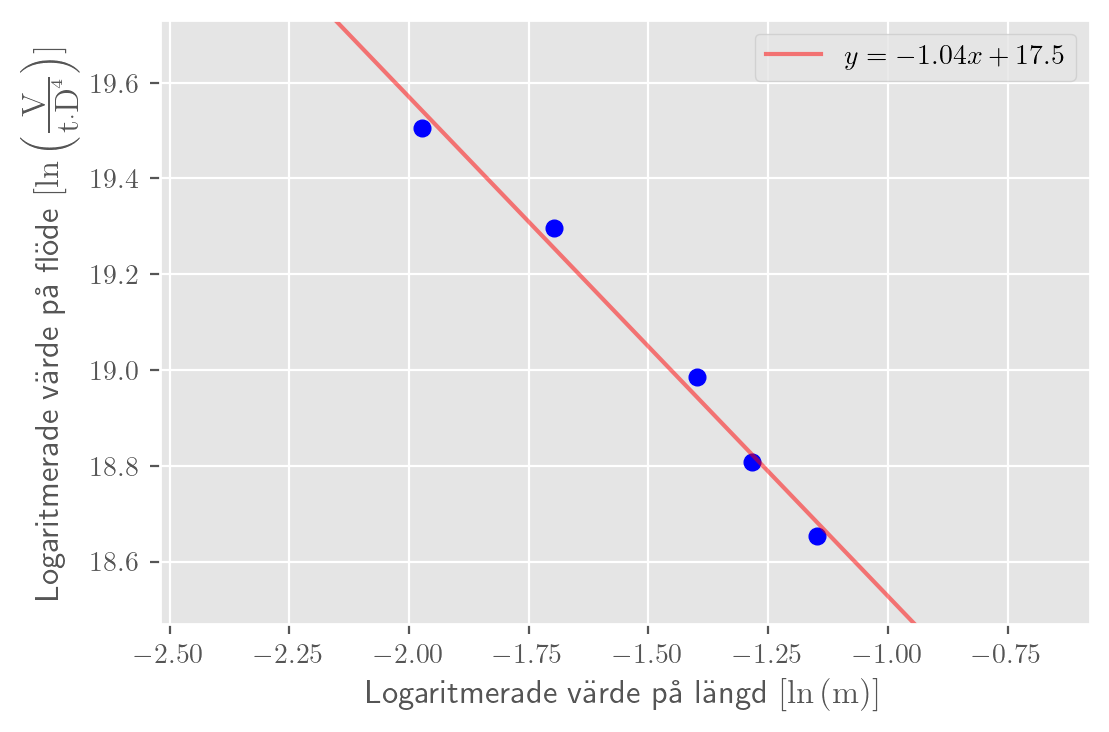

array([-1.04237309, 17.48523204])

In [3]:
# Calculate flowrate
flowRates = np.divide(fillVolume, meanTests)

# Logarithmic flow
lnFlowRate = np.log(flowRates)

# Logarithmic diameter
lnDiameters = np.log(diameters)

# find a, from previous plot, flöde_per_diameter.
a = 3.96558481

# Logarithmic length
lnLengths = np.log(lengths)

# Fits the data to a graph using least squares
poly = np.polyfit(lnLengths, np.subtract(lnFlowRate, a*lnDiameters), 1)

x1, x2 = -2.1, -1
y1, y2 = x1*poly[0] + poly[1], x2*poly[0] + poly[1]
plt.axline((x1, y1), (x2, y2), alpha=0.5, color="red", label=r'$y = -1.04x + 17.5$')
plt.gcf().set_dpi(200)
ax = plt.gca()
ax.axis("equal")
plt.xlabel(r'Logaritmerade värde på längd $[\ln \left( \textrm{m}'
             r'\right)]$')
plt.ylabel(r'Logaritmerade värde på flöde $[\ln\left('
             r'\frac{\textrm{V}}{\textrm{t} \cdot \textrm{D}^4}\right)]$')

plt.scatter(lnLengths, np.subtract(lnFlowRate, a*lnDiameters), color="blue")
plt.legend()
plt.show()
poly